In [109]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('headlines_with_coordinates.csv')

In [111]:
df.head()

headline         cities  latitude  \
0                 Zika Outbreak Hits Miami          Miami  25.77427   
1          Could Zika Reach New York City?  New York City  40.71427   
2        First Case of Zika in Miami Beach    Miami Beach  25.79065   
3  Mystery Virus Spreads in Recife, Brazil         Recife  -8.05389   
4  Dallas man comes down with case of Zika         Dallas  32.78306   

   longitude countrycode  
0  -80.19366          US  
1  -74.00597          US  
2  -80.13005          US  
3  -34.88111          BR  
4  -96.80667          US

Re-cluster the world and US data separately.
This may require different clustering parameters for each dataset.
Put your code into functions to quickly cluster and visualize results of the model.
Sort the clusters by the number of headlines from largest to smallest.
Sort headlines within each cluster by finding headlines closest to the center of the cluster.
You can average the location coordinates in each cluster to get an approximation of the center. If you want to be more accurate, then you’ll need to apply a geographic formula to find the true geographic center of each cluster.
Examine the headlines closest to the center of each cluster. Record any repeated diseases in the headlines. Do this for both the US and the world data.
If no diseases appear to be repeating, try the clustering again. Also make sure to look at enough headlines within each cluster to find repeated diseases.
Pinpoint disease outbreaks based on repeated diseases within headlines in clusters. Prepare final maps of the United States and the world.
If you find one or two major diseases, you can find all mentions of it in headlines using regular expressions.
Remove any irrelevant headlines from the map for presentation.

In [112]:
df_USA = df[df.countrycode=='US'].reset_index(drop=True)

In [113]:
df_USA.shape

(310, 5)

In [114]:
df_world = df[df.countrycode!='US'].reset_index(drop=True)

In [115]:
df_world.head()

headline     cities  latitude  \
0            Mystery Virus Spreads in Recife, Brazil     Recife  -8.05389   
1                  Trinidad confirms first Zika case   Trinidad -14.83333   
2              Geneve Scientists Battle to Find Cure     Geneve  46.20222   
3                 Zika Infested Monkeys in Sao Paulo  Sao Paulo -23.54750   
4  San Juan reports 1st U.S. Zika-related death a...   San Juan -31.53750   

   longitude countrycode  
0  -34.88111          BR  
1  -64.90000          BO  
2    6.14569          CH  
3  -46.63611          BR  
4  -68.53639          AR

In [116]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [117]:
def plot_map(df):
    map_plotter = Basemap()
    fig = plt.figure(figsize=(60,20))
    map_plotter.shadedrelief()
    map_plotter.drawcountries()
    colors = plt.cm.rainbow(np.linspace(0,1,len(df.cluster.unique()+2)))
    
    for i in range(-1,len(colors)-2):
        map_plotter.scatter(df[df.cluster==i]['longitude'],df[df.cluster==i]['latitude'], latlon=True , c=np.array([colors[i+2]]), label='Cluster: {}'.format(i))    
    
    plt.legend(loc='lower right')
    return plt.show()

In [118]:
import numpy as np

def great_circle_distance(coord1, coord2, radius=3956):
    """
    Calculates the great circle distance between two coordinates or arrays of coordinates.
    """
    if np.array_equal(coord1, coord2):
        return 0.0

    # Convert lat/lon to radians
    coord1, coord2 = np.radians(coord1), np.radians(coord2)
    # Find the difference between the coordinates
    delta_x, delta_y = coord2 - coord1
    
    # Apply Haversin formula
    haversin = np.sin(delta_x / 2) ** 2 + np.product(
        [np.cos(coord1[0]), np.cos(coord2[0]), np.sin(delta_y / 2) ** 2]
    )

    # Convert to distance in miles
    return 2 * radius * np.arcsin(haversin ** 0.5)

In [119]:
def clusters_dbscan(df,eps, samples, metric='euclidean'):
    dbscan = DBSCAN(eps=eps, min_samples=samples)
    dbscan.fit(df[['latitude','longitude']])
    df['cluster'] = list(dbscan.labels_)
    dbscan.

USA

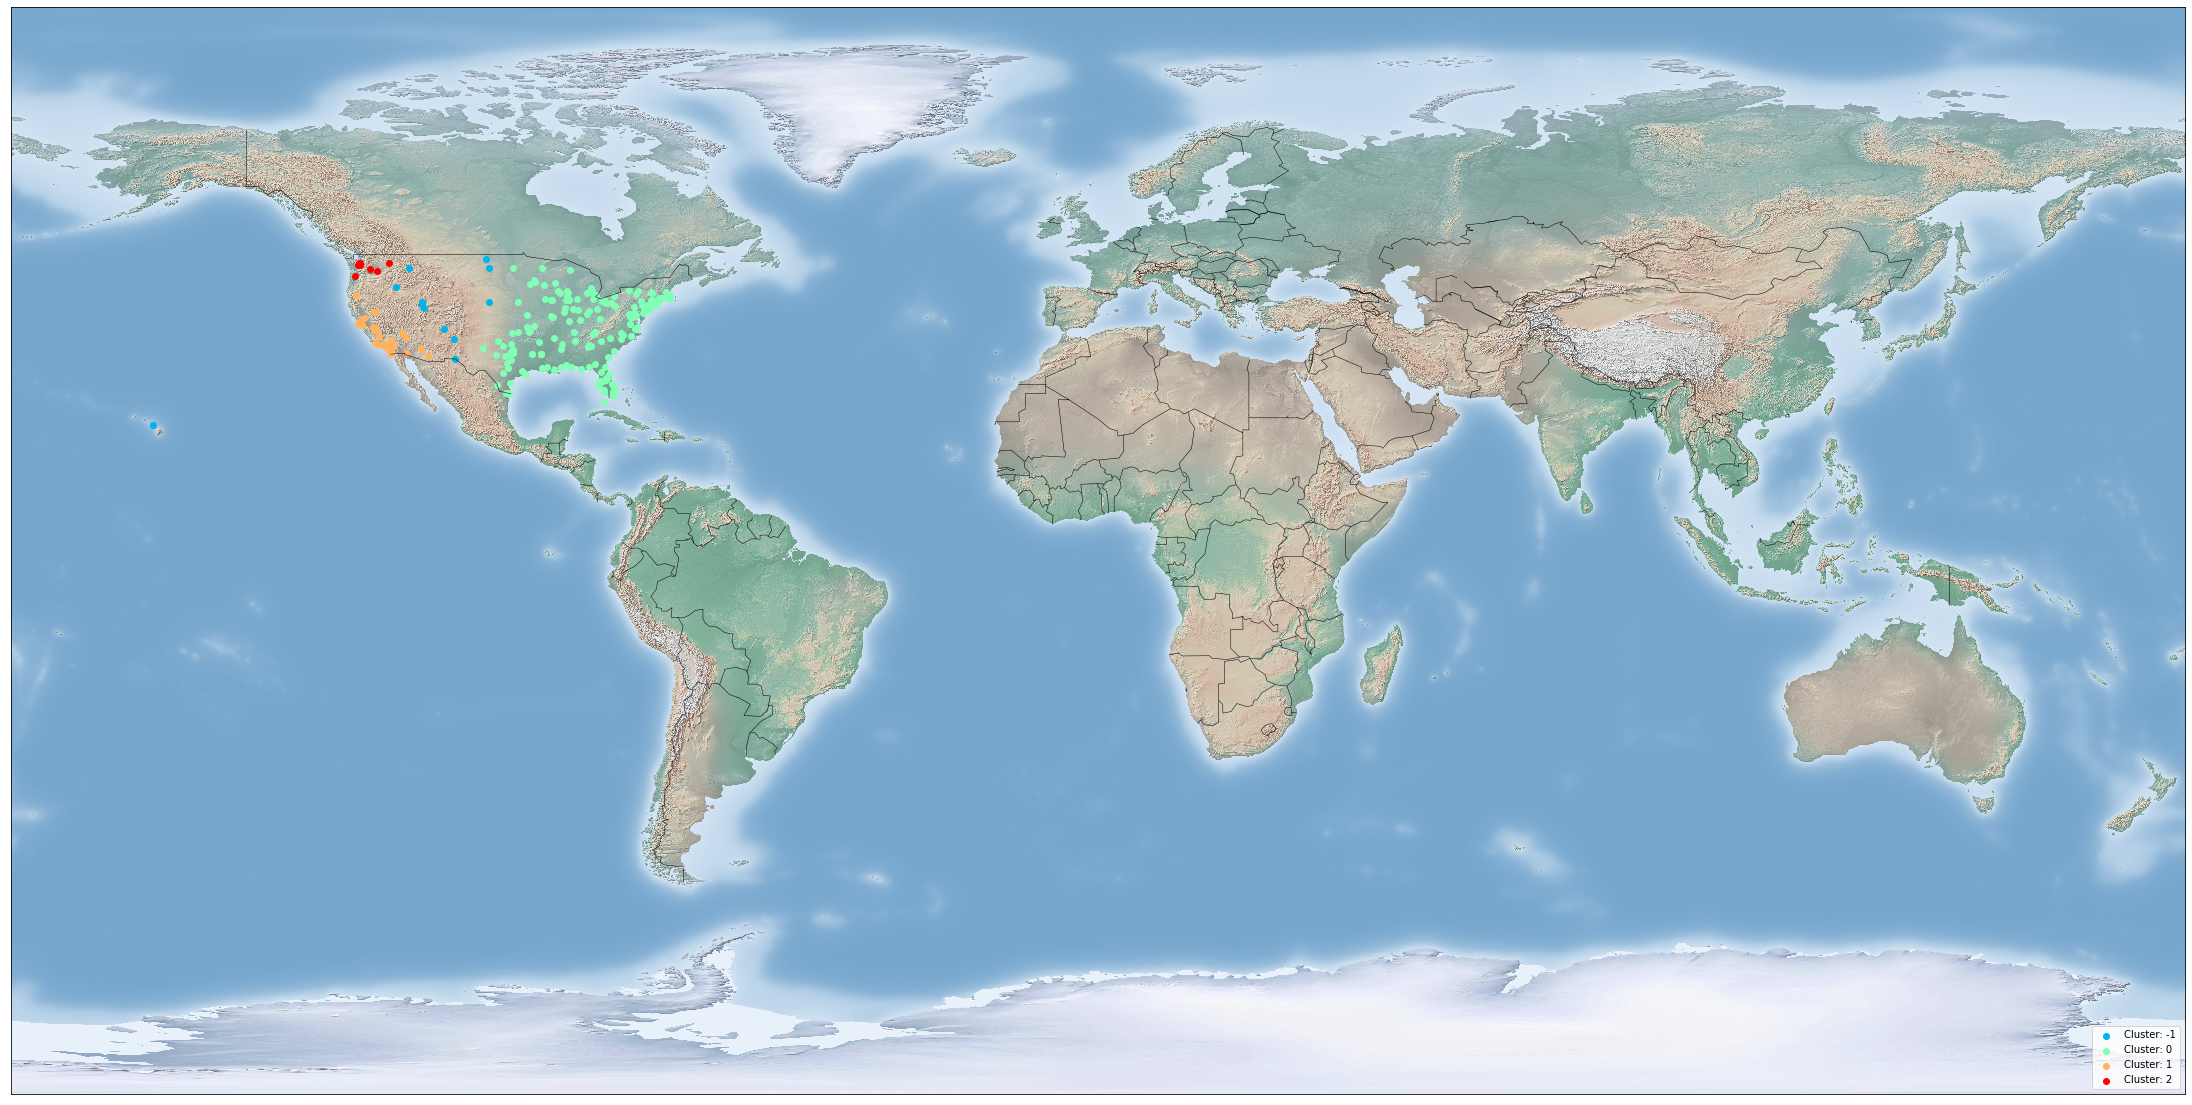

In [120]:
clusters_dbscan(df_USA,4,7, metric=great_circle_distance)
plot_map(df_USA)

WORLD

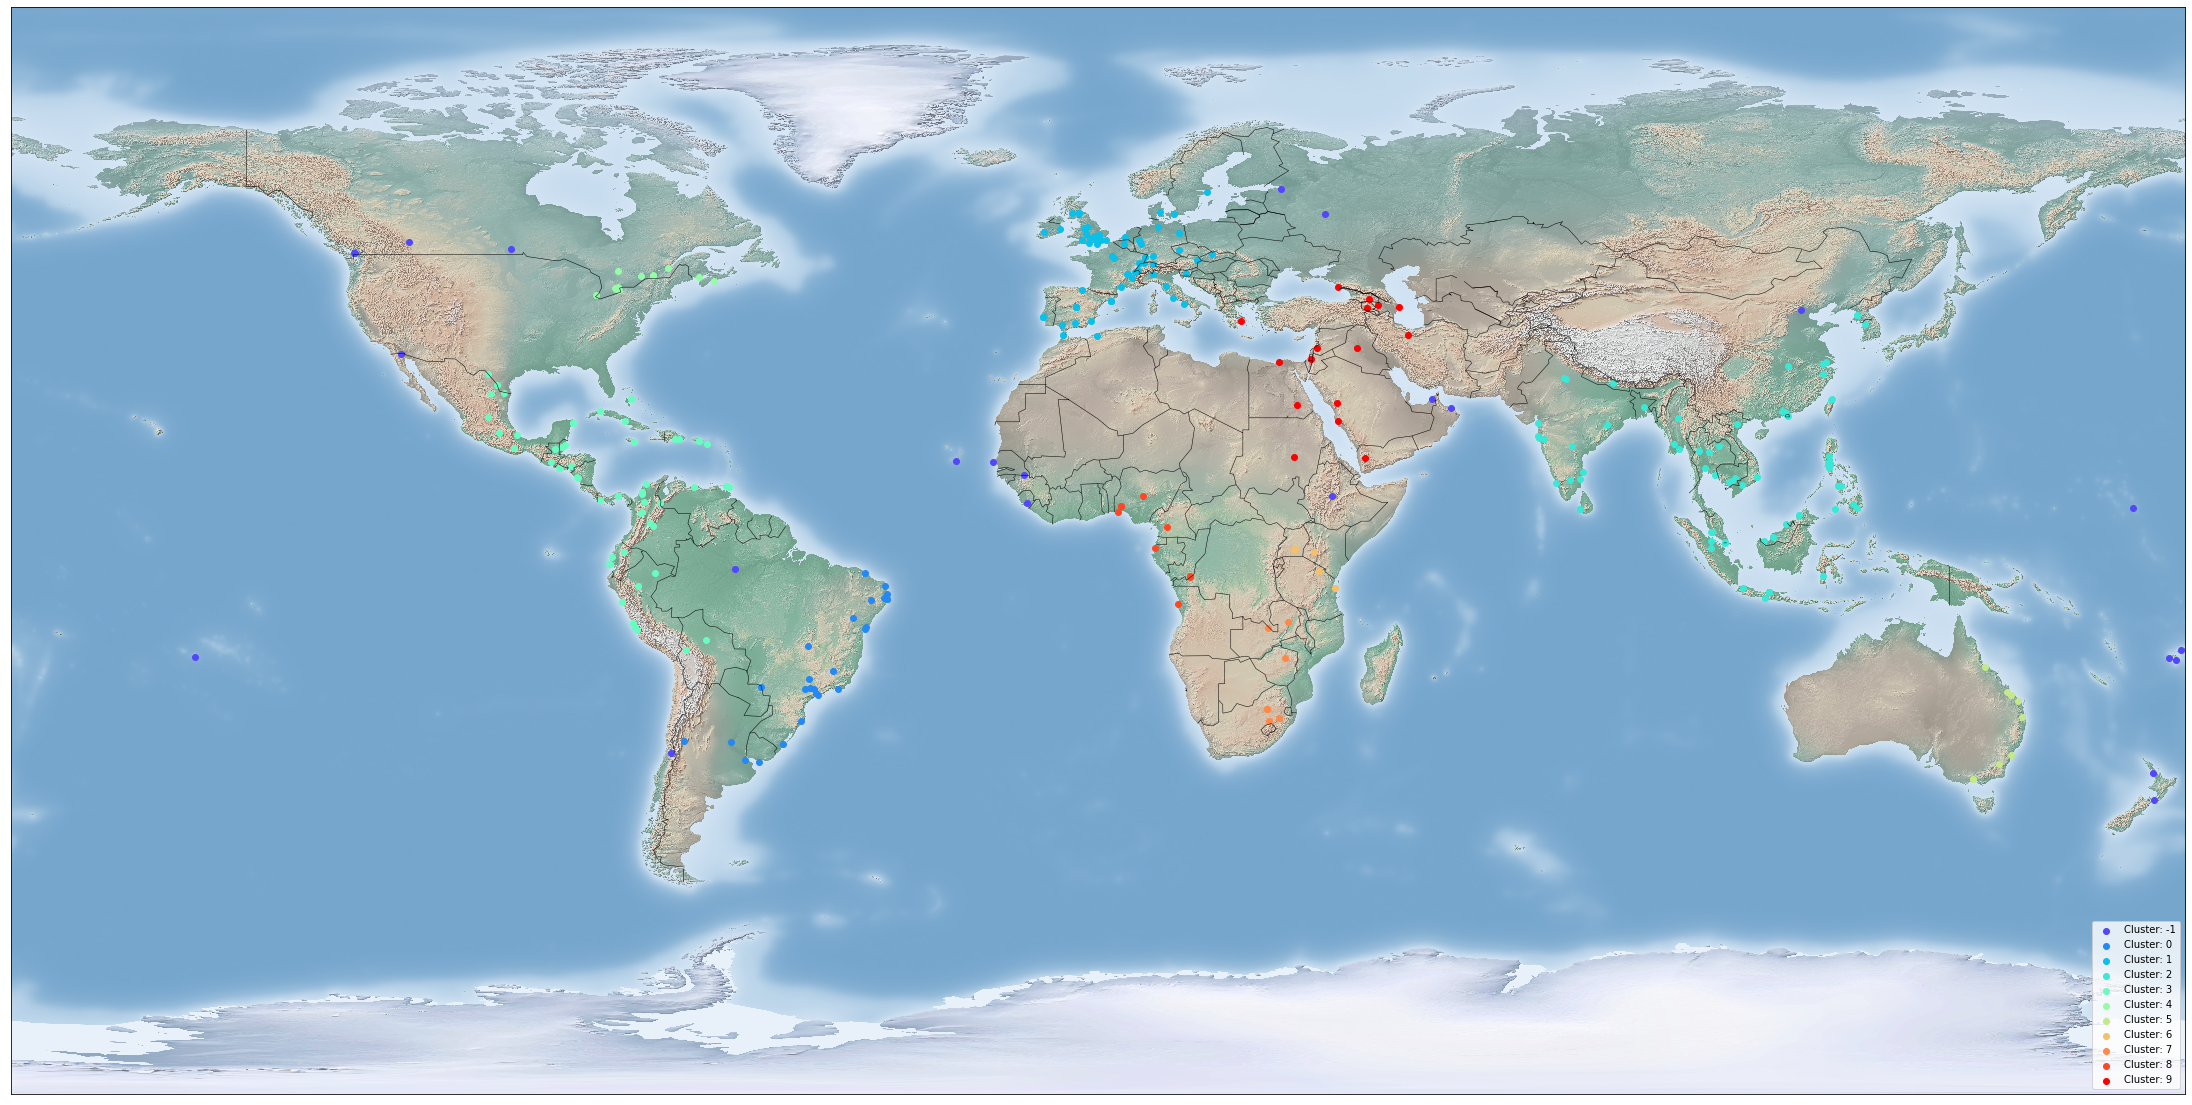

In [121]:
clusters_dbscan(df_world,9.5,5, metric=great_circle_distance)
plot_map(df_world)

Sort the clusters by the number of headlines from largest to smallest.

In [122]:
df_USA.groupby('cluster').count()[['headline']].sort_values(by='headline', ascending=False)

headline
cluster          
 0            222
 1             60
-1             13
 2              8
 3              7

In [123]:
df_world.groupby('cluster').count()[['headline']].sort_values(by='headline', ascending=False)

headline
cluster          
 2             77
 1             67
 3             59
 0             26
-1             24
 9             16
 4             12
 5              9
 8              9
 7              7
 6              6
 10             4


Sort headlines within each cluster by finding headlines closest to the center of the cluster.
You can average the location coordinates in each cluster to get an approximation of the center. If you want to be more accurate, then you’ll need to apply a geographic formula to find the true geographic center of each cluster.

In [124]:
for i in df_USA.cluster.unique():
    lat_mean.append(df_USA[df_USA.cluster==i]['latitude'].mean())
    lng_mean.append(df_USA[df_USA.cluster==i]['longitude'].mean())

In [125]:
df_USA.cluster.unique()

array([ 0,  1,  2,  3, -1], dtype=int64)

In [126]:
 df_USA.iloc[4].cluster

0

In [127]:
lat_mean, lng_mean = [],[]

for i in range(df_USA.shape[0]):
    cluster = df_USA.iloc[i].cluster
    lat_mean.append(df_USA[df_USA.cluster==cluster]['latitude'].mean())
    lng_mean.append(df_USA[df_USA.cluster==cluster]['longitude'].mean())
    
df_USA['latitude_mean'] = lat_mean
df_USA['longitude_mean'] = lng_mean

In [129]:
from math import radians, degrees, sin, cos, asin, acos, sqrt
def great_circle_distance_2points(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    return 6371 * (
        acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))) 

In [133]:
df_USA.iloc[1]['longitude']

-74.00596999999999

In [136]:
distances=[]
for i in range(df_USA.shape[0]): 
    distances.append(great_circle_distance_2points(df_USA.iloc[i]['longitude'],df_USA.iloc[i]['latitude'], df_USA.iloc[i]['longitude_mean'], df_USA.iloc[i]['latitude_mean']))

In [139]:
df_USA['distance_from_the_center'] = distances

In [151]:
pd.set_option('display.max_rows', None, 'display.max_columns', None )
pd.set_option('max_colwidth', 400)

In [157]:
cluster0 = df_USA[df_USA.cluster==0].sort_values(by='distance_from_the_center', ascending=True)[['headline']]

In [160]:
diseases = ['Zika', 'Measles','Hepatitis','Syphilis','Dengue','Herpes', 'Tuberculosis','Chickenpox','Rhinovirus', 'Rotavirus','Norovirus','Chlamydia']

In [169]:
counter = 0
for i,headline in enumerate(cluster0):
    if 'Zika' in cluster0.iloc[i].values[0]:
        counter=counter+1
print(counter)
    

0


In [178]:
'Dengue' in str(cluster0.iloc[4].values[0])

True

In [177]:
cluster0.iloc[4].values[0]

'Lawrenceville is infested with Dengue'

In [166]:
cluster0

headline
275                       Rumors about Hepatitis E Spreading in Morristown have been Refuted
162                                                 Spike of Rhinovirus Cases in Sevierville
150                                                             Chickenpox Hits Simpsonville
178                                                   West Nile Virus Exposure in Alpharetta
255                                                    Lawrenceville is infested with Dengue
48                                                    Zika cases concern Charlotte residents
170                                   Schools in Huntington Closed Due to Rotavirus Outbreak
5                                                      The CDC in Atlanta is Growing Worried
25                                                  Nashville takes precautions against Zika
54                                                    West Nile Virus Outbreak in Louisville
59                          Rumors about Rotavirus spreading in Huntsville have been refuted
47                                                             First Zika Case in Cincinnati
65                                                          Case of Mumps Reported in Dayton
118                             More people in Durham are infected with Chlamydia every year
264                                          Hepatitis D Symptoms Spread all over Evansville
36                                                                  First Columbus Zika case
270                                     Fayetteville authorities confirmed the spread of HIV
70                                                      Will Norovirus vaccine help Raleigh?
136                                                     Meningitis re-emerges in Summerville
123                       More people in Indianapolis are infected with Norovirus every year
41                         Authorities are Worried about the Spread of Influenza in Savannah
227                                                Tupelo Residents Recieve Syphilis vaccine
204                        More Patients in Crawfordsville are Getting Diagnosed with Rabies
168                                                     How to Avoid Norovirus in Greenville
205                                                 Spike of Hepatitis B Cases in Greenville
143                       Authorities are Worried about the Spread of Chickenpox in Richmond
116                  Lower Hospitalization in Richmond after Mumps Vaccine becomes Mandatory
113                                                    Greenwich Establishes Zika Task Force
125                                          Rotavirus Vaccine is now Required in Starkville
82                                            Pittsburgh Residents Recieve Norovirus vaccine
179                                                Herpes Vaccine is now Required in Mattoon
206                         Authorities are Worried about the Spread of Hepatitis D in Akron
90                                                  Zika battle outlined at Valdosta meeting
302                                                Malaria Vaccine is now Required in Elyria
141                                  The Spread of Rhinovirus in Boardman has been Confirmed
296                                          Memphis Encounters Severe Symptoms of Swine Flu
149                                                            Zika case confirmed in Lorain
269                                           Manassas Encounters Severe Symptoms of Measles
81                                           Urbana Encounters Severe Symptoms of Meningitis
256                                                       Gonorrhea has Arrived in Avon Lake
77                                                            Chikungunya Exposure in Toledo
241                                                             Outbreak of Zika in Leesburg
21                                                          Zika virus reported in Cl